## K Bhuvandeep
## 20MID0061
## VIT VELLORE
## SMART BRIDGE AI ASSIGNMENT2

## This project aims to analyze the relationship between various medical parameters and drug effectiveness. The dataset consists of patient information, 
##including age, sex, blood pressure levels (BP), cholesterol levels, sodium-to-potassium ratio (Na_to_K), drug type, and corresponding labels. The goal is to develop a model that can accurately predict the class or category of a given drug based on its features.

## Task 1: Read the dataset and do data pre-processing


In [3]:
##IMPORTING THE LIBRARIES
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mp

In [5]:
#LOAD THE DATASET
dataset = pd.read_csv('E:\\AI\\drug200.csv')

## Overiew of dataset

In [6]:
dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## DATASET PREPROCESSING

In [7]:
dataset.shape

(200, 6)

## CHECK FOR MISSING VALUES

In [9]:
dataset.isnull()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
195,False,False,False,False,False,False
196,False,False,False,False,False,False
197,False,False,False,False,False,False
198,False,False,False,False,False,False


In [10]:
#Dataset information
dataset.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [11]:
#check for statistical info
dataset.describe

<bound method NDFrame.describe of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

Visualize in the Graph forms

<AxesSubplot:xlabel='Drug', ylabel='count'>

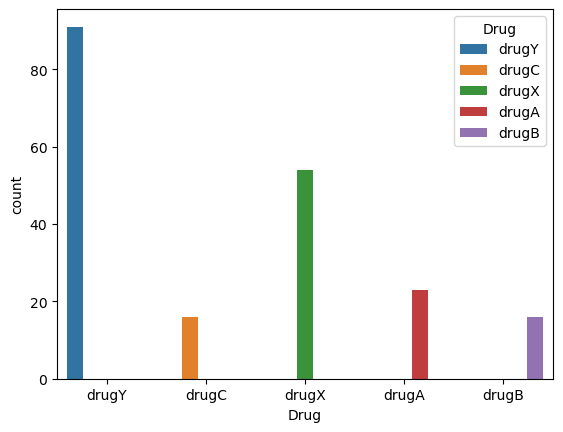

In [12]:
sb.countplot(x='Drug',data=dataset,hue='Drug')

<AxesSubplot:xlabel='Sex', ylabel='count'>

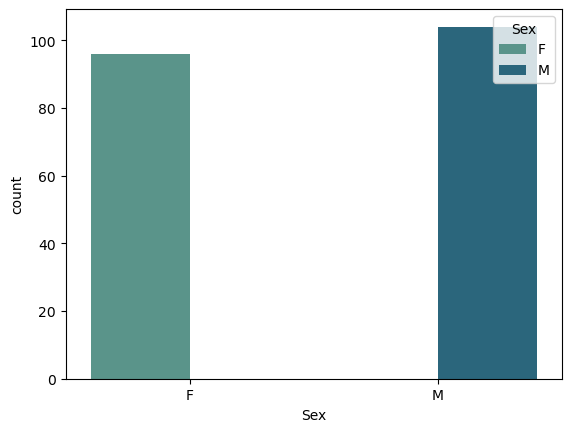

In [13]:
sb.countplot(x='Sex',data=dataset,palette='crest',hue='Sex')

<AxesSubplot:xlabel='BP', ylabel='count'>

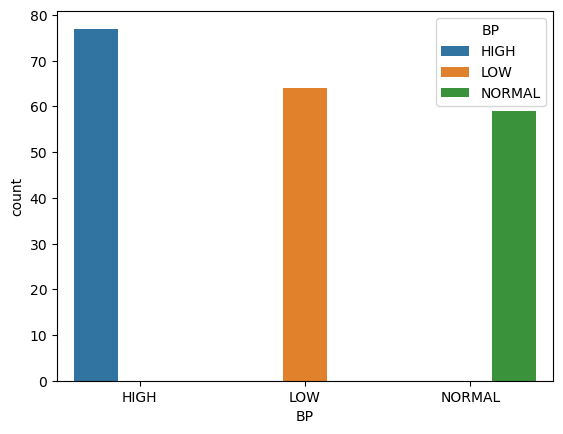

In [14]:
sb.countplot(x='BP',data=dataset,hue='BP')

<AxesSubplot:xlabel='Na_to_K', ylabel='Count'>

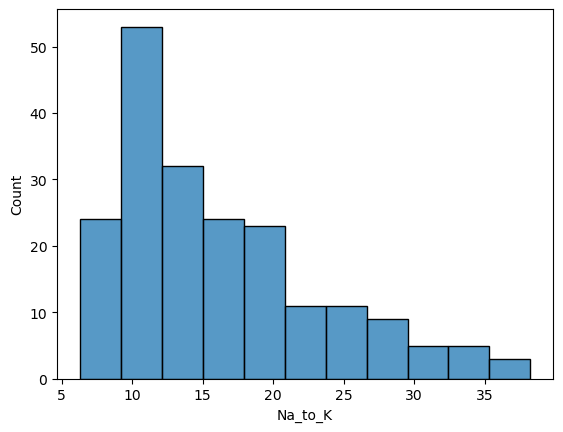

In [15]:
sb.histplot(x='Na_to_K',data=dataset)

Segregate the data into train & test

In [16]:
#segregate the data into the train & test
X = dataset.drop(columns = ['Drug'],axis=1)
Y = dataset['Drug']

In [17]:
#Drug column is the output(target) column in this dataset.

Y_class = len(np.unique(Y))
print(Y_class)

5


Convert the Categorical data into interger data¶


In [18]:
X = pd.get_dummies(X,columns=['Sex','BP','Cholesterol'],drop_first = True)

LE = LabelEncoder()
Y = LE.fit_transform(Y)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y,test_size=0.3,random_state=2)

Feature Scaling


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [21]:
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)

create a model


In [22]:
model = Sequential()
model.add(Dense(48, input_dim=6, activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
output_layer = Dense(Y_class,activation='softmax')
model.add(output_layer)

In [23]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                336       
                                                                 
 dense_1 (Dense)             (None, 36)                1764      
                                                                 
 dense_2 (Dense)             (None, 24)                888       
                                                                 
 dense_3 (Dense)             (None, 12)                300       
                                                                 
 dense_4 (Dense)             (None, 5)                 65        
                                                                 
Total params: 3,353
Trainable params: 3,353
Non-trainable params: 0
_________________________________________________________________


compile the model


In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train the model


In [25]:
model.fit(X_train,Y_train,epochs=48,batch_size=6)


Epoch 1/48
24/24 [==============================] - 1s 2ms/step - loss: 1.6519 - accuracy: 0.2000
Epoch 2/48
24/24 [==============================] - 0s 2ms/step - loss: 1.5241 - accuracy: 0.6000
Epoch 3/48
24/24 [==============================] - 0s 2ms/step - loss: 1.3940 - accuracy: 0.6286
Epoch 4/48
24/24 [==============================] - 0s 2ms/step - loss: 1.1631 - accuracy: 0.6500
Epoch 5/48
24/24 [==============================] - 0s 1ms/step - loss: 0.9151 - accuracy: 0.6857
Epoch 6/48
24/24 [==============================] - 0s 2ms/step - loss: 0.7460 - accuracy: 0.6857
Epoch 7/48
24/24 [==============================] - 0s 2ms/step - loss: 0.6345 - accuracy: 0.7286
Epoch 8/48
24/24 [==============================] - 0s 2ms/step - loss: 0.5276 - accuracy: 0.8000
Epoch 9/48
24/24 [==============================] - 0s 3ms/step - loss: 0.4205 - accuracy: 0.9000
Epoch 10/48
24/24 [==============================] - 0s 2ms/step - loss: 0.3133 - accuracy: 0.9429
Epoch 11/48
24/24 [

evaluate the model on the test set

In [26]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc * 100)

2/2 [==============================] - 0s 0s/step - loss: 0.5697 - accuracy: 0.8500
Test accuracy: 85.00000238418579
